# Car Sales - Exploratory Data Analysis

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Replace drive with mode](#section401)<br/>
    - 4.2 [Dealing with zeros in price](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Deriving carType column from registration and mileage](#section404)<br/>
    - 4.5 [Creating Gold Data](#section405)<br/>
    - 4.6 [Pandas Post Profiling Report](#section406)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [New vs Used Cars Distribution](#section501)<br/>
    - 5.2 [Pairplots for price, mileage, engV, year](#section502)<br/>
    - 5.3 [price Vs year Variables Relation](#section503)<br/>
    - 5.4 [Decoding price vs engV Relation](#section504)<br/>
    - 5.5 [price vs engType Relationship](#section505)<br/>
    - 5.6 [engV vs mileage Relationship](#section506)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [What are the top car makes that have been sold most?](#section601)<br/>
     - 6.2 [Of the top car makes, which have the highest number of total sale prices](#section602)<br/>
     - 6.3 [Which car type (New/Used) among these top car makes contribute towards the highest total prices](#section603)<br/>
     - 6.4 [Of the top 5 car makes towards highest total, what engine types with respect to car segmentation (New/Used) should be considered?](#section604)<br/>
         - 6.4.1 [Count Plot for top 5 makes to know the total number of units per engine type and car segmentation](#section641)<br/>
         - 6.4.2 [Point Plot for top 5 makes to know how engine types of these fare with price](#section642)<br/>
         - 6.4.3 [Calculating priority of car makes with respect to their variants and their contribution towards total sales cost](#section643)<br/>
- 7. [Hypothesis Check](#section7)<br/>  
      - 7.1 [Hypothesis 1](#section701)<br/>
      - 7.2 [Hypothesis 2](#section702)<br/>
      - 7.3 [Hypothesis 3](#section703)<br/>
- 8. [Conclusion](#section8)<br/>


<a id=section1></a>
## 1. Problem Statement !

"This dataset deals with the inventory sales information of a car deal
ership in US. 
<a id=section101></a>
### 1.1. Introduction
A car dealership would have cars of different makes. Its very important for a dealership to know how its inventory is doing with respect to sales on a timely basis and what cars should it stock-in in the inventory in order to increase the sales.

<a id=section102></a>
### 1.2. Data source and dataset

__a__. Source of Data

- __Name__: "Sales Data of Car Inventory"
- __Dealership Name__: Bergstorm Dealer Automotive
- __Description__: Bergstorm Dealer Autmotive is a huge car dealership with lot of inventory. This inventory sales data of it is very crucial in knowing how good the dealership has been functioning in terms of sales

<a id=section2></a> 
### 2. Load the packages and data

In [1]:
import sys
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


carsalesfile = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv'
carsales= pd.read_csv(carsalesfile, encoding='ISO-8859-1')

<a id=section3></a>
### 3. Data Profiling

Let's first review what data types the variables are?<br>
Do we need to transform any variable with respect to standards before we start analysis?

<a id=section301></a>`

In [2]:
carsales.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section302></a>

In [3]:
carsales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section303></a>

In [4]:
carsales.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


### Observations

From the above, we can infer that:
__a__. Volkswagen is the car make that delership has

<a id=section304></a>

In [5]:
carsales.sample(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
5930,Daewoo,3200.0,sedan,123,1.3,Gas,yes,2006,Sens,front
3367,Kia,10900.0,crossover,131,2.0,Gas,yes,2008,Sportage,full
5619,Volkswagen,11500.0,van,210,2.0,Diesel,yes,2012,Caddy ãðóç.,front
6565,Daewoo,3450.0,sedan,110,1.5,Gas,yes,2007,Lanos,front
6844,Skoda,8900.0,sedan,140,1.6,Petrol,yes,2009,Octavia A5,front
8536,BMW,30500.0,crossover,147,3.0,Diesel,yes,2008,X5,full
7703,Nissan,9000.0,sedan,25,1.6,Petrol,yes,2011,Almera,front
4642,ZAZ,2350.0,sedan,85,1.2,Petrol,yes,2008,1103 Ñëàâóòà,front
865,Volkswagen,11500.0,sedan,119,2.0,Diesel,yes,2007,Passat B6,front
5723,Renault,8800.0,van,200,1.9,Diesel,yes,2005,Trafic ïàññ.,front


<a id=section305></a>

In [6]:
pre_profile = pandas_profiling.ProfileReport(carsales)
pre_profile.to_file(outputfile='carsales_before_profiling.html')

<a id=section306></a>
### 3.6 Initial Observations:

- Summary of datatypes in this data set:
 - <em>Numeric</em>: <br><strong>price, engV</strong> (float64)<br><strong>mileage, year</strong>(integer)
 - <em>Object</em>: <br><strong>car, body, engType, registration, model, drive</strong><br><br>

- <strong>price</strong> variable has got 267 zeros, which means that the sale price of these cars is 0. Now this needs to be corrected for in a car dealership no car sale price can be 0 which would be a huge loss for that dealership
- <strong>mileage</strong> variable has got 348 zeros which means that these cars are pretty new. So this car dealership has got an inventory of used and new cars.
- <strong>drive</strong> and <strong>engV</strong> have got 511 and 434 missing values respectively. We need to investigate why.
- <strong>car</strong> vairable has got 87 unique which means the dealership has got 87 different car makes in its inventory
- <strong>body</strong> variable has got 6 distinct values namely - <i>sedan, hatch, van, crossover, vagon, other</i>
- <strong>engType</strong> variable has got 4 distinct types namely - <i>Petrol, Diesel, Gas, Other </i>
- <strong>drive</strong> variable has got 3 distinct values namely - <i>rear, full, front</i>
- <strong>registration</strong> variable gives an initial clue about whether a car is used or new. We should carefully segreagate the car type.
<br><br>
- There are 113 duplicate rows as per the initial profiling report. We need to get rid of redundant data to have accurate results in analysis

#### -> Dropping duplicates and Exploring drive and engType variables to deal with NaN values.

In [7]:
unique_car_sales = carsales.drop_duplicates()
print('The shape of new data frame with only unique records is:', unique_car_sales.shape)
print('The null values in this unique data frame are:\n', unique_car_sales.isnull().sum())

The shape of new data frame with only unique records is: (9463, 10)
The null values in this unique data frame are:
 car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64


We should be replacing 510 NaN values in drive column with the mode since drive is a categorical variable. 
The mode should be pertaining to each car's make, model, body, engType because that way we are not assigning one car's drive type to another one.

#### -> Getting to know what <i>registration</i> means

In [8]:
unique_car_sales.groupby('registration')['registration'].count()

registration
no      561
yes    8902
Name: registration, dtype: int64

So, <strong>8902</strong> cars have got registrations and <strong>561</strong> didn't have to be precise. But then we can't make out whether a car is used or new from the registration alone. <br>We also need to take mileage into picture.
https://beatthecarsalesman.com/how-many-miles-should-a-new-car-have/

Sometimes dealerships purchase cars from manufacturers and get them registered on their names initially. So technically these are pre-registered cars that are also new. Only way to find them among those with registration is to look for mileage below our threshold value (which is below 100). <br>
Hence our formula for carType is => new car = registered car with mileage <=99 + all the unregistered cars and rest is used car

<a id=section307></a>
### 3.7 Final Observations

- Variables to be transformed prior to analysis are:
    - <strong>drive</strong>: The <i>NaN</i> should be replaced with respective modes as discussed above
    - <strong>price</strong>: The <i>zeros</i> should be replaced with median values of their respective car's <i>make (car variable), model,                                   body, engType</i> because we can't consider price of one car's make and include in median calculation of other car's price. 
    - <strong>engV</strong>: The <i>NaN</i> should be replaced with respective median values of their respective car's specificaton 
    - <strong>carType</strong>: New column should be created based on the formula derived above using <i>registration</i> and <i>mileage</i> variables
    

<a id=section4></a>
## 4. Data Normalization

<a id=section401></a>
### 4.1 Replace missing values in <i>drive</i> column
Since drive is a categorical variable, we can replace the missing values with its mode

In [9]:
drivemode = unique_car_sales['drive'].mode()[0]
print('We can replace the missing values of drive column with this mode value: ', drivemode)
unique_car_sales.drive = unique_car_sales.drive.fillna(drivemode)
print('The number of null values after replacement with mode are: ', unique_car_sales.drive.isnull().sum())

We can replace the missing values of drive column with this mode value:  front
The number of null values after replacement with mode are:  0


<a id=section402></a>
### 4.2 Dealing with zeros of <i>price</i> column 
Lets see if we can reduce the number of zeros in the price column to the minimum with proper replacement as discussed above in __section 3.7__

#### Price distribution

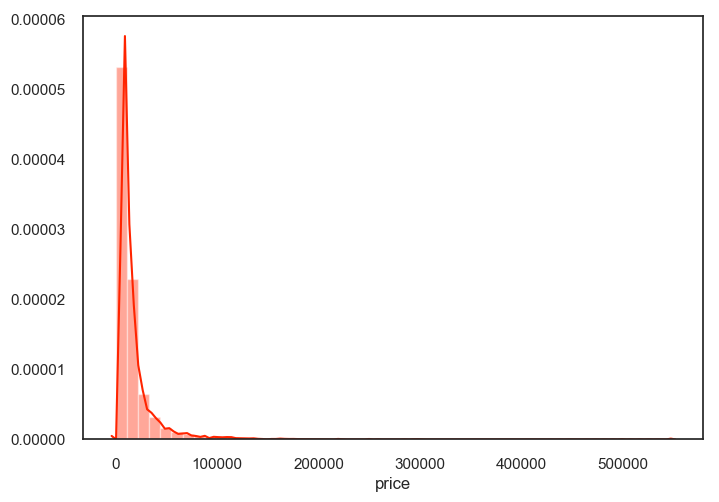

In [10]:
sns.set(color_codes=True, style='white')
sns.set_palette(sns.color_palette('autumn'))
sns.distplot(unique_car_sales['price'].dropna(), kde=True)

- <strong><i>Observations:</i></strong><br>
We can see from the above dsitribution that it is right skewed, which means positively skewed. Most of the values are in the 0-50000 range and continue to go extremes. Here in this case, mean is greater than median. Depending upon outliers only we can decide to go with mean or median.

#### Box plot for Outliers

Text(0.5,0,'Price')

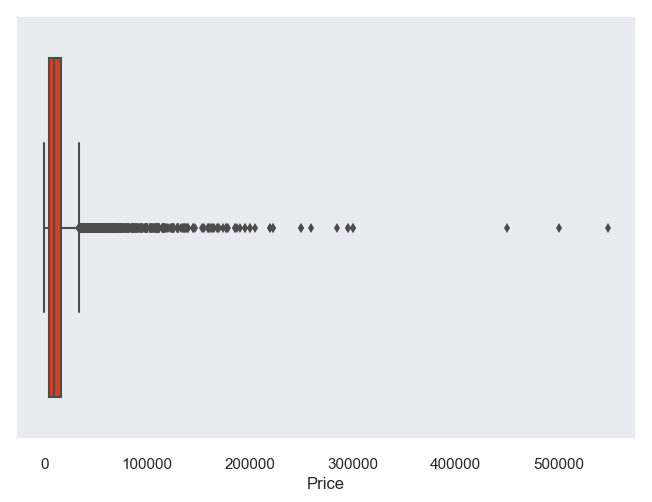

In [11]:
sns.set_style('dark')
sns.boxplot(unique_car_sales['price'])
plt.xlabel('Price')

- <strong><i>Observations:</i></strong><br>
Therefore from the above there are quite a few prices that are outside the interquartile range. These are those prices that pull mean towards them and make the distribution as right-skewed as seen above. Hence to avoid effect of outliers on <i>mean</i>, we are considering <strong><i>median</i></strong> as our <strong><i>measure of central tendency</i></strong> for replacing zeros

#### Calculations for replacing zeros using median of car with respect to its make, model, body, engType

In [12]:
car_index_keys = ['car', 'model', 'body', 'engType']

#Setting the index of unique_car_sales by car_index_keys
#unique_car_sales.reset_index(inplace=True)

#Segregating the missing cars with 0 prices 
car_missing_prices = unique_car_sales[unique_car_sales.price == 0]

#Calculate the missing prices median price by grouping them by groupby_keys
car_group_missing_median = car_missing_prices.groupby(car_index_keys).price.median()

#Calculate the median price of cars with avilable prices by grouping them by groupby_keys
car_group_median_price = unique_car_sales.groupby(car_index_keys).price.median()

#Updating the missing group with median prices of their respective grouped cars with indexes being the same
car_group_missing_median.update(car_group_median_price)

#Updating the unique_car_sales df with newly found median values
unique_car_sales.set_index(car_index_keys, inplace=True)
unique_car_sales.update(car_group_missing_median)
unique_car_sales = unique_car_sales.reset_index()

In [13]:
unique_car_sales.head()

,car,model,body,engType,price,mileage,engV,registration,year,drive
0,Ford,Kuga,crossover,Gas,15500.0,68,2.5,yes,2010,full
1,Mercedes-Benz,E-Class,sedan,Gas,20500.0,173,1.8,yes,2011,rear
2,Mercedes-Benz,CL 550,other,Petrol,35000.0,135,5.5,yes,2008,rear
3,Mercedes-Benz,B 180,van,Diesel,17800.0,162,1.8,yes,2012,front
4,Mercedes-Benz,E-Class,vagon,Other,33000.0,91,NaN,yes,2013,front


In [14]:
unique_car_sales[unique_car_sales['price']==0].count()

car             38
model           38
body            38
engType         38
price           38
mileage         38
engV            32
registration    38
year            38
drive           38
dtype: int64

- <strong><i>Observations</i></strong><br>
   Since there are 38 units with prices as 0, let's see if we can drop them after analyzing <strong><i>engV</i></strong> variable too

<a id=section403></a>
### 4.3 Dealing with NaN of <i>engV</i> column

Let's see if we can reduce the number of NaN values and bring it to the minimum. 

#### Distribution of <i>engV</i>

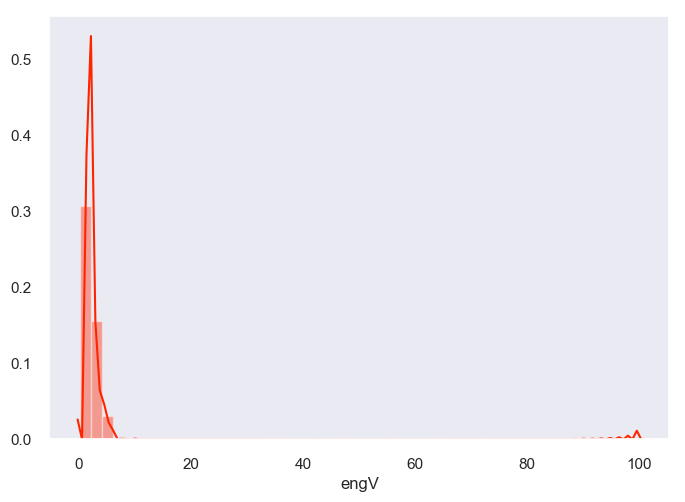

In [15]:
sns.set(color_codes=True, style='dark')
sns.set_palette(sns.color_palette('autumn'))
sns.distplot(unique_car_sales['engV'].dropna(), kde=True)

Replacing these with median values of engine versions of respective car's specifications as discussed above in __section 3.7__ since it's a right skewed and there are some values in 90-100 range too.

In [16]:
#Calculating engine version median of group of car_index_keys
engine_version_group_median = unique_car_sales.groupby(car_index_keys).engV.median()

#DF of engine version NaN values
engine_version_missing = unique_car_sales[unique_car_sales['engV'].isnull()]

#Grouping the missing engine version values with car_index_keys 
engine_version_group_missing = engine_version_missing.groupby(car_index_keys).engV.median()

#Updating the engine_version_group_missing with respective median values 
engine_version_group_missing.update(engine_version_group_median)

#Updating the unique_car_sales with newly populated engine version grouped values
unique_car_sales.set_index(car_index_keys, inplace=True)
unique_car_sales.update(engine_version_group_missing)
unique_car_sales.reset_index(inplace=True)

print('After processing with respective group median values, null values?', unique_car_sales['engV'].isnull().sum())

After processing with respective group median values, null values? 131


- Though we have cleaned up maximum number of null values in the variable as above, its not sufficient to go with the existing null values into analysis.<br>
- Hence this time we shall <strong><i>forward fill</i></strong> the values with respect their <strong><i>car_index_keys</i></strong>. <br>
- Doing this shall ensure that we haven't got any null values left logically.

In [17]:
unique_car_sales.head()

,car,model,body,engType,price,mileage,engV,registration,year,drive
0,Ford,Kuga,crossover,Gas,15500.0,68,2.5,yes,2010,full
1,Mercedes-Benz,E-Class,sedan,Gas,20500.0,173,2.3,yes,2011,rear
2,Mercedes-Benz,CL 550,other,Petrol,35000.0,135,5.5,yes,2008,rear
3,Mercedes-Benz,B 180,van,Diesel,17800.0,162,1.8,yes,2012,front
4,Mercedes-Benz,E-Class,vagon,Other,33000.0,91,NaN,yes,2013,front


In [18]:
#engine_version_group_median = unique_car_sales.groupby(car_index_keys).engV.median()

#DF of engine version NaN values
engine_version_missing = unique_car_sales[unique_car_sales['engV'].isnull()]

#Grouping the missing engine version values with car_index_keys 
engine_version_group_missing = engine_version_missing.groupby(car_index_keys).engV.median()

#Updating the engine_version_group_missing with respective median values 
engine_version_group_missing.update(engine_version_group_median.ffill())

#Updating the unique_car_sales with newly populated engine version grouped values
unique_car_sales.set_index(car_index_keys, inplace=True)
unique_car_sales.update(engine_version_group_missing)
unique_car_sales.reset_index(inplace=True)

print('After processing with respective group median values, null values?', unique_car_sales['engV'].isnull().sum())

After processing with respective group median values, null values? 0


Its evident that we have cleaned up the <strong>engV</strong> variable totally. Good to go.

<a id=section404></a>
### 4.4 Deriving <i>carType</i> from <i>registration</i> and <i>mileage</i>

As discussed in __section 3.7__ we are going to include a create a new variable called <i>carType</i>

In [19]:
registered = unique_car_sales[unique_car_sales['registration']=='yes']

#Registered cars but with mileage below our threshold 100
registered_new = registered[registered['mileage']<=99]

#Unregistered cars 
unregistered = unique_car_sales[unique_car_sales['registration']=='no']

#New cars df
new_cars = unregistered.append(registered_new)

#Adding the column
unique_car_sales['carType'] = unique_car_sales.apply(lambda x: 'N' if (x.name in new_cars.index) else 'U', axis=1)

In [20]:
unique_car_sales.head()

,car,model,body,engType,price,mileage,engV,registration,year,drive,carType
0,Ford,Kuga,crossover,Gas,15500.0,68,2.5,yes,2010,full,N
1,Mercedes-Benz,E-Class,sedan,Gas,20500.0,173,2.3,yes,2011,rear,U
2,Mercedes-Benz,CL 550,other,Petrol,35000.0,135,5.5,yes,2008,rear,U
3,Mercedes-Benz,B 180,van,Diesel,17800.0,162,1.8,yes,2012,front,U
4,Mercedes-Benz,E-Class,vagon,Other,33000.0,91,2.1,yes,2013,front,N


<a id=section405></a>
### 4.5 Creating Gold Data

#### Final Check
- Checking <strong>price</strong> column for it still has got 38 units as zeros. <br>
    -> Droping them because don't want to add bias by replacing them with values of median of their car make and model groups. <br>
    -> We have got total of <strong>9463</strong> observations and I think its okay to drop <strong>38</strong>. The new DF shall be our gold data
- Dropping <strong>drive</strong> column for we are not going to read more into it as per initial heatmap and other variables analysis

In [21]:
car_sales_gold = unique_car_sales[unique_car_sales['price']!=0]
car_sales_gold = car_sales_gold.drop('drive', axis=1)
car_sales_gold.count()

car             9425
model           9425
body            9425
engType         9425
price           9425
mileage         9425
engV            9425
registration    9425
year            9425
carType         9425
dtype: int64

#### Correlation of features

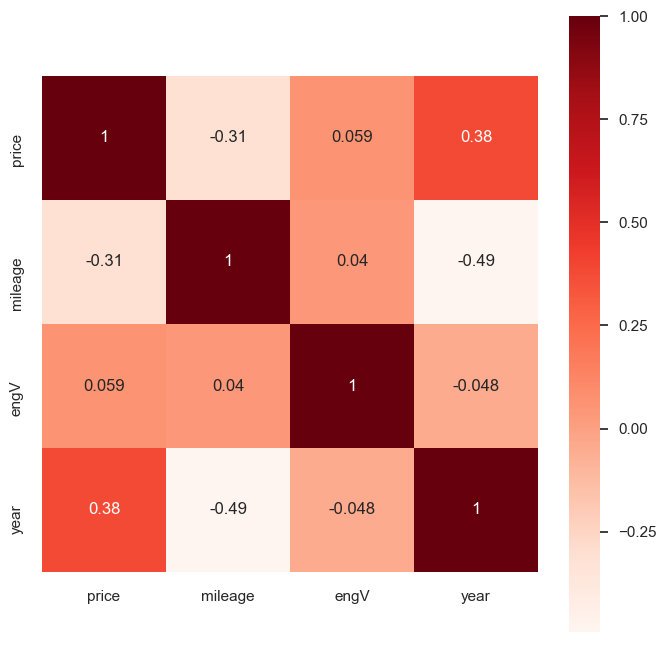

In [22]:
features_correlation = car_sales_gold.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Reds')
plt.show()

<a id=section406></a>
### 4.6 Pandas Post Profiling Report

In [23]:
post_profile = pandas_profiling.ProfileReport(car_sales_gold)
post_profile.to_file('car_sales_post_profiling_report.html')

In [24]:
car_sales_gold.head()

,car,model,body,engType,price,mileage,engV,registration,year,carType
0,Ford,Kuga,crossover,Gas,15500.0,68,2.5,yes,2010,N
1,Mercedes-Benz,E-Class,sedan,Gas,20500.0,173,2.3,yes,2011,U
2,Mercedes-Benz,CL 550,other,Petrol,35000.0,135,5.5,yes,2008,U
3,Mercedes-Benz,B 180,van,Diesel,17800.0,162,1.8,yes,2012,U
4,Mercedes-Benz,E-Class,vagon,Other,33000.0,91,2.1,yes,2013,N


Questions:

- How many cars have got the registrations?
- Which car make has the dealership sold the most?
- What are the top 3 selling car makes?
- How many used and new cars are sold by the dealershi?
- How does a mileage effect the price of a car?
- How does engV effect the price of the car?
- How are engV and mileage are correlated?

<a id=section5></a>
## 5. Identifying patterns in data

<a id=section501></a>
### 5.1 <i>New</i> vs <i>Used</i> Cars Distribution

Text(0,0.5,'Frequency')

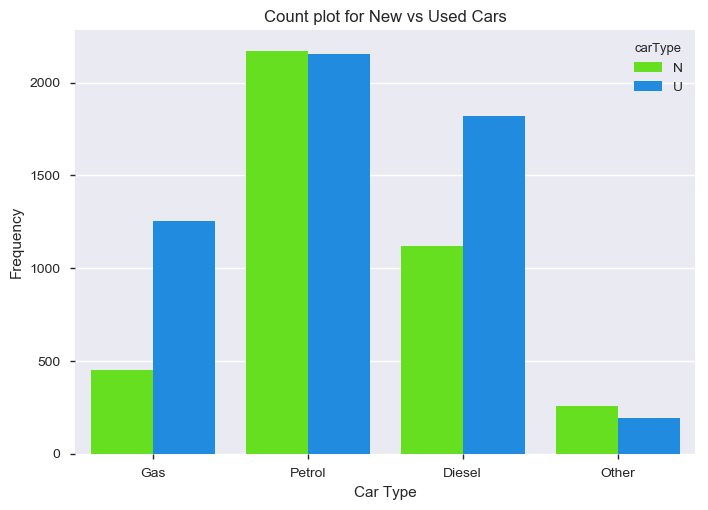

In [25]:
sns.countplot(x='engType', hue='carType', data=car_sales_gold, palette='gist_rainbow').set_title('Count plot for New vs Used Cars')
plt.xlabel('Car Type')
plt.ylabel('Frequency')


- <strong>Observations</strong><br>
   From the above, we notice that the Used car sales <strong>(blue)</strong> are higher than New cars ones <strong>(green)</strong>.
- <strong>Question</strong><br>
    Of the inventory sales, how much would new cars and used cars contribute?

In [26]:
car_sales_gold.groupby(['carType']).price.sum()

carType
N    8.633002e+07
U    5.720094e+07
Name: price, dtype: float64

<a id=section502></a>
### 5.2 Pair plots for <i>price, mileage, engV, year</i> 

To know how price, engV, mileage, year relate with each other, we are going to do a pairplot for them with carType as the backdrop, just to to understand how the segmentation of new and used cars

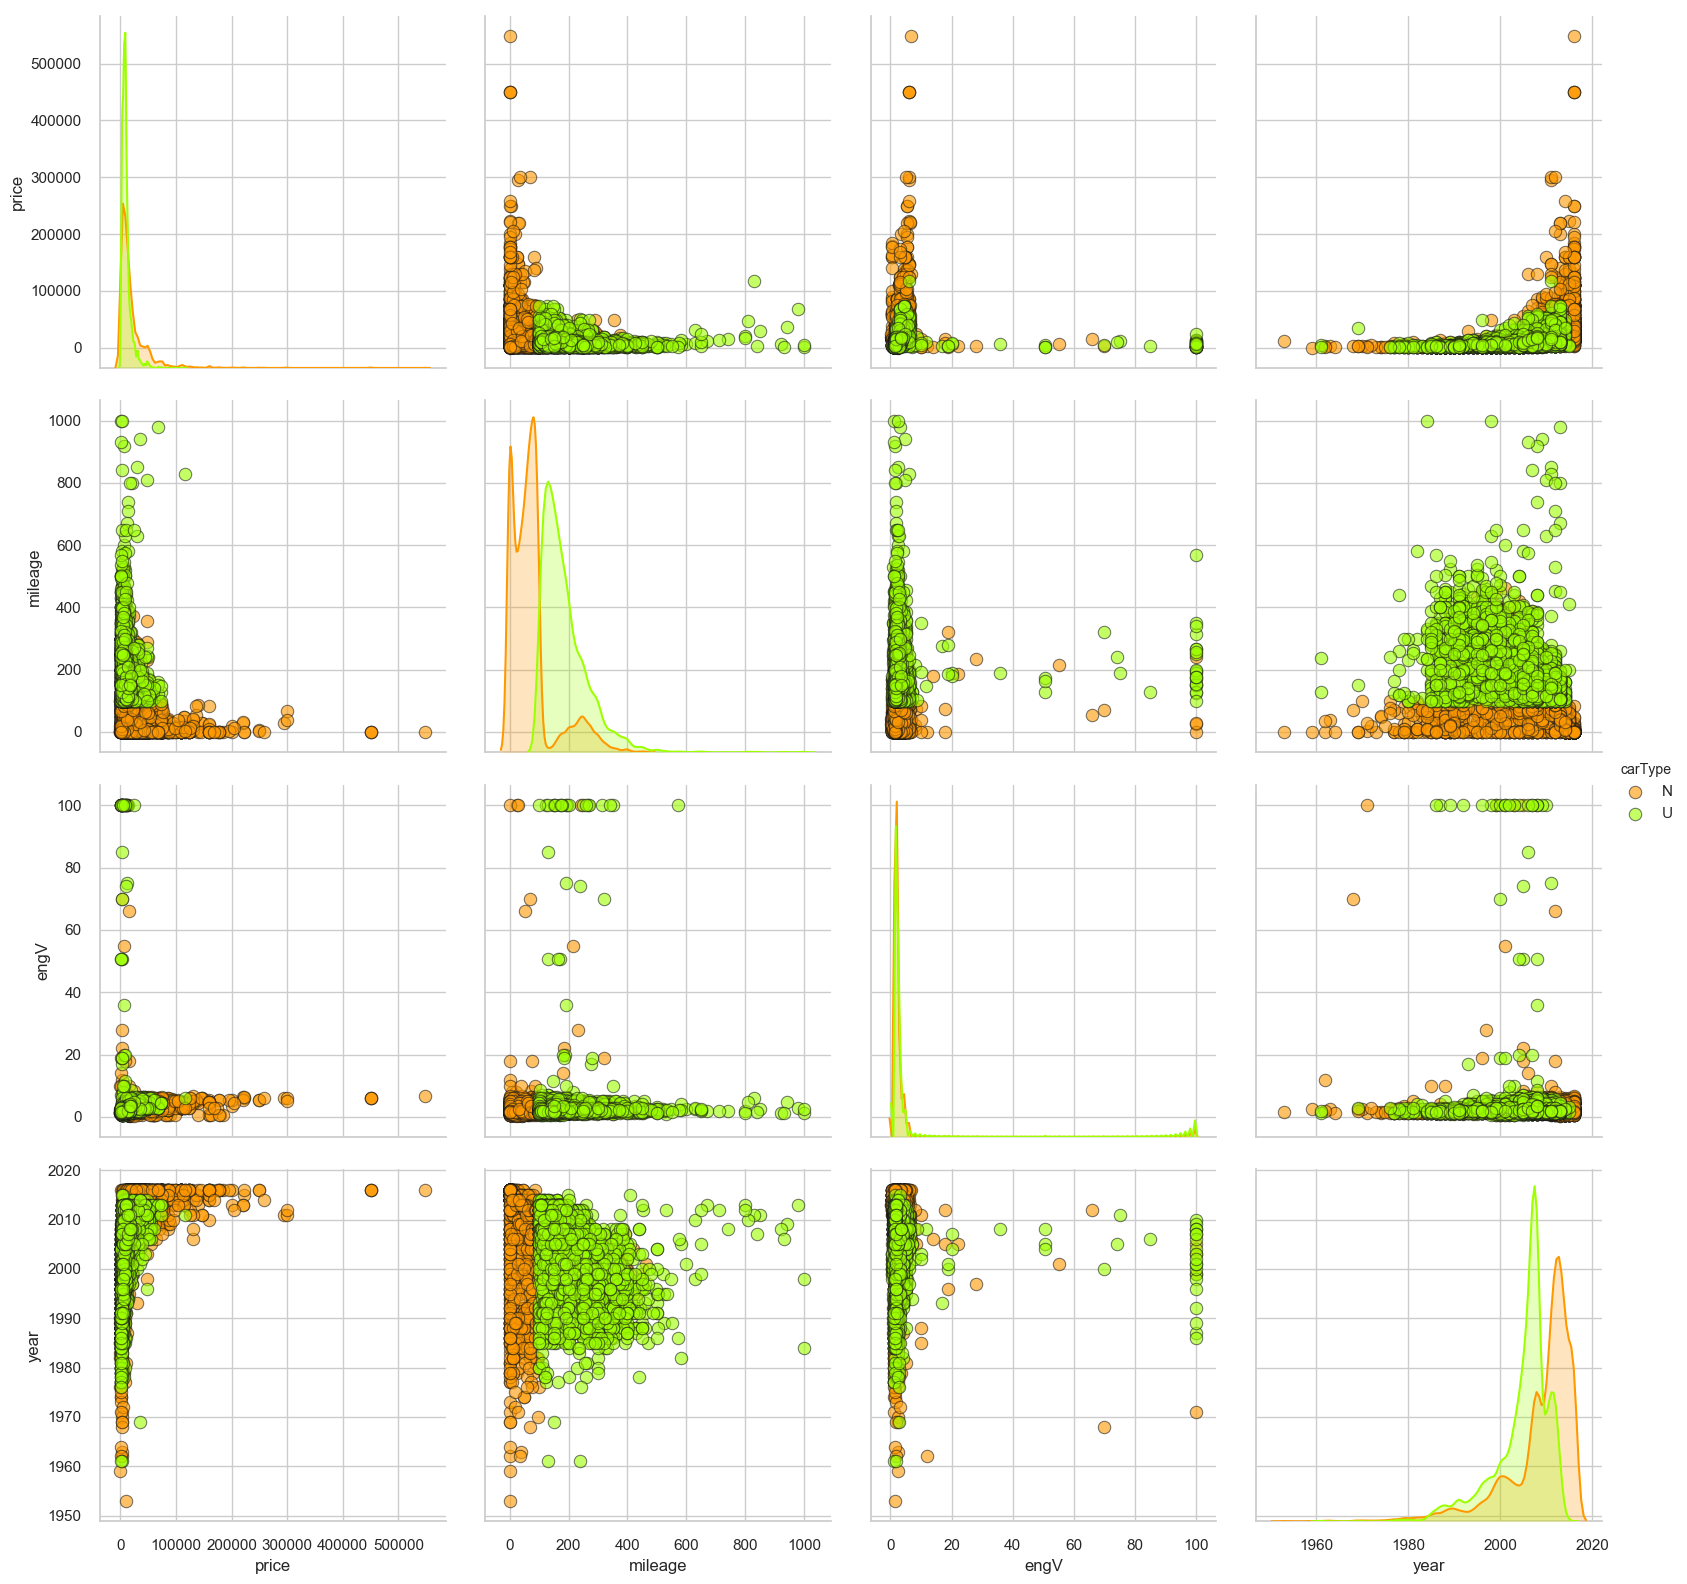

In [27]:
sns.set(color_codes=True, style='whitegrid')
sns.set_palette(sns.color_palette('gist_rainbow'))
sns.pairplot(car_sales_gold, hue='carType', diag_kind='kde',
             plot_kws = dict(alpha=0.6, s=80, edgecolor = 'k'), size=4)

- <strong>Observations:</strong><br>
    - From the above, the diagonal gives us the kde distribution plots. <strong>Year</strong> is the only variable with skewness to the left. <br>
        - This implies that the dealership is catering to the latest needs and making the latest cars avaialble, especially in the <i>new car</i> segment
    - <strong>Mileage</strong> and <strong>Price</strong> are inversely related. As the mileage of the car increases, the price goes down. This is because they are more used. (green colored)

<a id=section503></a>
### 5.3 <i>price</i> vs <i>year</i> Variables Relation

Text(0.5,1,'Price trends of New/Used cars over the years')

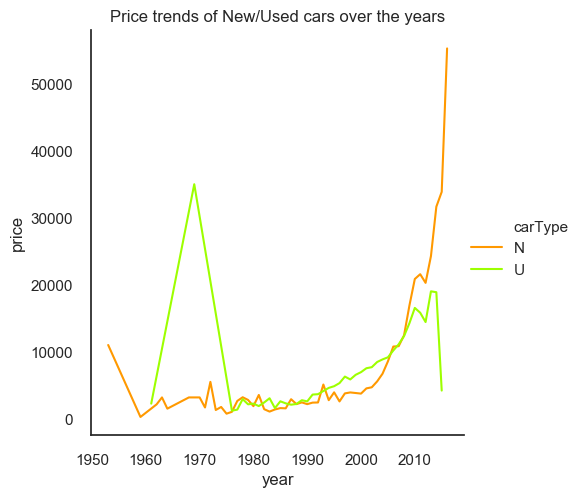

In [28]:
sns.set(color_codes=True, style='white')
sns.set_palette(sns.color_palette('gist_rainbow')), 
sns.relplot(data=car_sales_gold, x='year', y='price', kind='line', hue='carType', ci=None)
plt.title('Price trends of New/Used cars over the years')

- <strong> Observations:</strong><br>
    - The prices of <strong>new cars</strong> rose over the years than the <strong> used cars</strong> <br>
    - Irrespective of whether a car is new or used, prices are in an increasing trend. 
    - Peculiarly there's been a steep curve between years <i>1960 and 1980</i> for used cars. We shall find out that means

Cars between years 1960 and 1980

In [29]:
curve_used = car_sales_gold[car_sales_gold.apply(lambda x: x.loc['year'] in range(1960, 1980, 1) and x.loc['carType'] =='U', axis=1)]

<a id=section504></a>
### 5.4 Decoding <i>price</i> vs <i>engV</i> relation

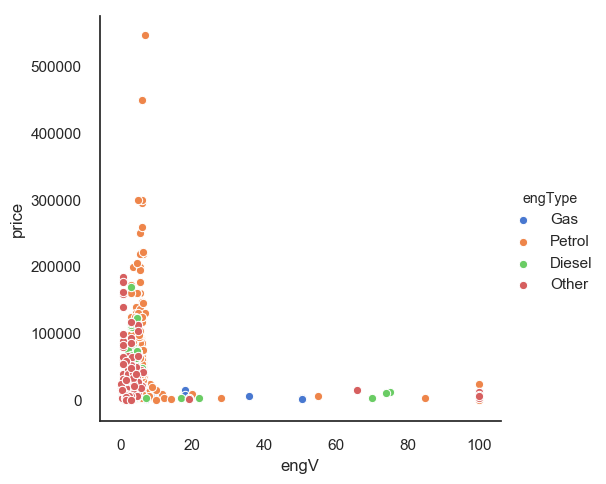

In [30]:
sns.set(color_codes=True, style='white')
sns.set_palette(sns.color_palette('muted'))
sns.pairplot(data=car_sales_gold, x_vars='engV', y_vars='price', size=5, hue='engType')
#sns.scatterplot(data=car_sales_gold, x='engV', y='price')

- <strong>Observations:</strong><br>
    - We can see from the above that the cluster is between engine versions 0-20. And most of these are high priced cars, of engineType <strong><i>Other</i></strong> and <strong><i>Petrol</i></strong>
    - Very few cars with high engine versions are priced a bit high. 
    - This means we should also explore <strong><i>engType</i></strong> vs <strong><i>price</i></strong> relation

<a id=section505></a>
### 5.5 <i>price</i> vs <i>engType</i> Relationship

Text(0.5,1,'Median price for different engine types of a New or Used car')

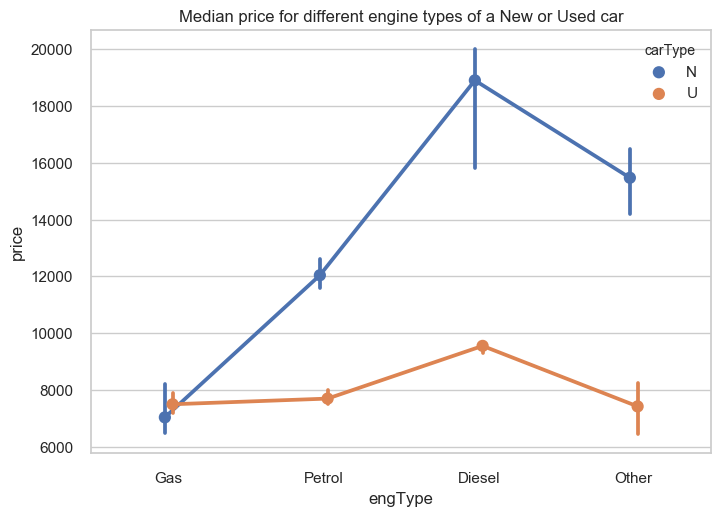

In [31]:
from numpy import median
sns.set(color_codes=True, style='whitegrid')
sns.pointplot(data=car_sales_gold, x='engType', y='price', dodge=True, hue='carType', estimator=median)
plt.title('Median price for different engine types of a New or Used car')

- <strong>Observations:</strong><br>
    - We can see from the above that <strong>New cars</strong> are priced more than <strong>Used cars</strong>
    - Except for enginType <strong>Gas</strong>, the median prices of New cars are way higher than their counterparts
    - Of these in the both cars segments, <strong><i>Diesel</i></strong> cars have got the highest prices, followed by <strong><i>Other</i></strong> category, <strong><i>Petrol</i> and <i>Gas</i></strong>

<strong>Note:</strong> Median has been chosen for there are few outliers in the price distribution as observed in __section 4.2__ and __section 5.2__

<a id=section506></a>
### 5.6 <i>engV</i> vs <i>mileage</i> Relationship

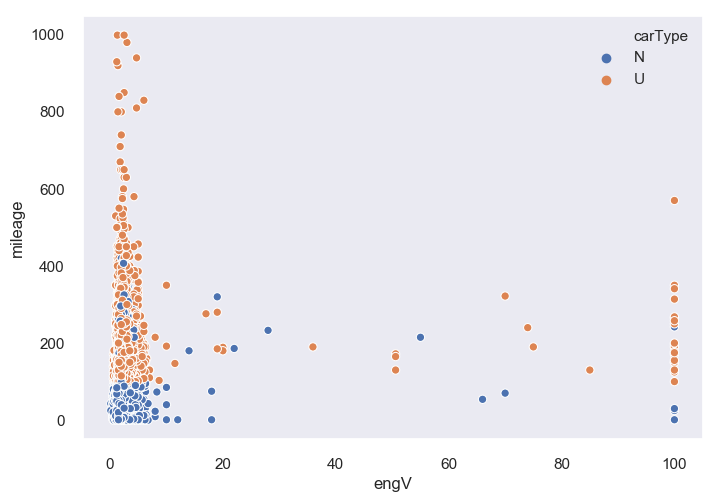

In [32]:
sns.set(color_codes=True, style='dark')
sns.scatterplot(data=car_sales_gold, x='engV', y='mileage', hue='carType')

#### <i>Which cars should the dealer stock-in to make his invetory sales better?</i>
In order to explore this answer, we should ask and explore asnwers of few more questions

<a id=section601></a>
#### 6.1 What are the top car makes that have been sold most?

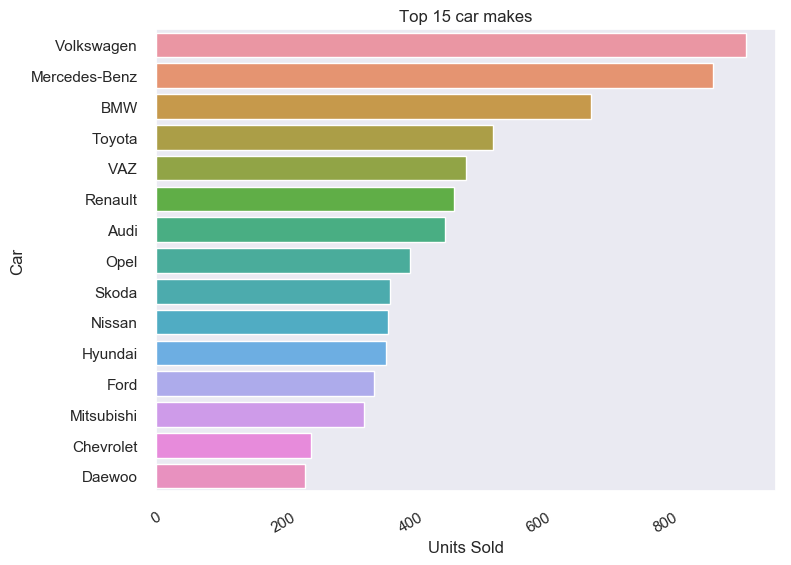

In [33]:
from collections import Counter
car_count = Counter(car_sales_gold['car'].dropna().tolist()).most_common(15)
car_makes = [car[0] for car in car_count]
car_count = [car[1] for car in car_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_count,y=car_makes)
plt.title('Top 15 car makes')
plt.xlabel('Units Sold')
plt.ylabel('Car')
ticks = plt.setp(ax.get_xticklabels(),rotation=30)

In [34]:
electric_cars = pd.crosstab(car_sales_gold.engType, car_sales_gold.car).loc['Other'].sort_values(ascending=False)
electric_cars[electric_cars.apply(lambda x: x>0)].count()

46

<a id=section602></a>
#### 6.2 Of the top car makes, which have the highest number of total sale prices

In [35]:
#The list of top 15 car makes sold is car_makes as calculated above
print('The top 15 car makes sold', len(car_makes))

top_car_makes = car_sales_gold[car_sales_gold.apply(lambda x: x['car'] in car_makes, axis=1)]

top_car_total_prices = top_car_makes.groupby('car').price.sum().astype(int).reset_index().sort_values('price', ascending=False).reset_index(drop=True)
top_car_total_prices

The top 15 car makes sold 15


,car,price
0,Mercedes-Benz,24937167
1,BMW,14605245
2,Volkswagen,11630278
3,Toyota,11187724
4,Audi,7625513
5,Nissan,5145136
6,Hyundai,4432027
7,Skoda,4009866
8,Renault,3739909
9,Ford,3669886


Text(0.5,1,'Total Sale Prices of top 15 car makes')

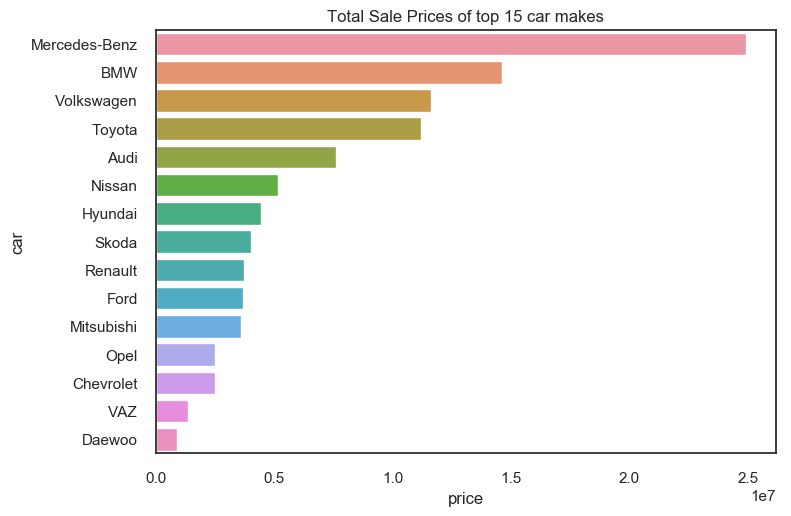

In [36]:
sns.set(color_codes=True, style='white')
sns.barplot(data=top_car_total_prices, x='price', y='car')
plt.title('Total Sale Prices of top 15 car makes')

- <strong>Observations:</strong>
    - The top 5 car makes with the highest total amount of sales are - <strong><i>Mercedes-Benz, BMW, Volkswagen, Toyota, Audi</i></strong>
 

<a id=section603></a>
#### 6.3 Which car type (New/Used) among these top car makes contribute towards the highest total prices

Text(0.5,1,'Number of Units sold for engine variants of top 5 car makes')

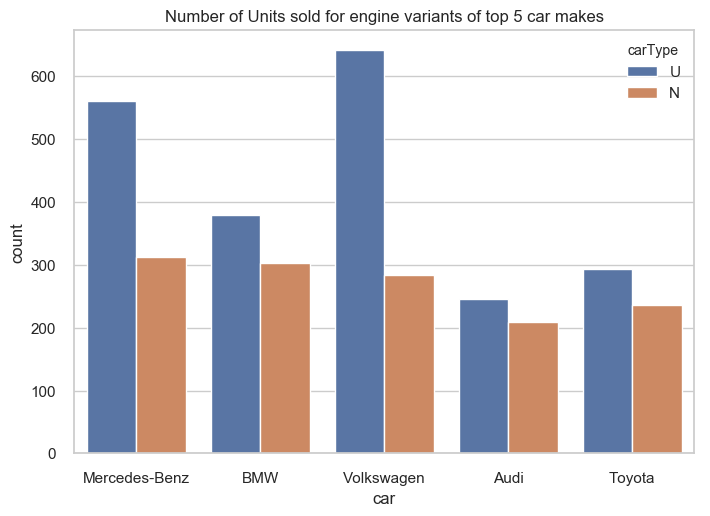

In [37]:
highest_car_makes = ['Mercedes-Benz', 'BMW', 'Volkswagen', 'Toyota', 'Audi']
sns.set(color_codes=True, style='whitegrid')
sns.countplot(data=top_car_makes[top_car_makes['car'].apply(lambda x: x in highest_car_makes)], x='car', hue='carType')
plt.title('Number of Units sold for engine variants of top 5 car makes')

- <strong>Observations:</strong>
    - <strong>Used cars</strong> of the top 5 makes contribute towards the total units sold, effecting the sale prices than their counterparts
    - <strong><i>Volkwagen</i></strong> being the best contributor, followed by <strong><i>Mercedes-Benz, BMW, Toyota, Audi</i></strong> in <strong>Used cars</strong> segment
    - <strong><i>Mercedes-Benz</i></strong> is best contributor, followed by <strong><i>BMW, Volkwagen, Toyota, Audi</i></strong> in<strong> New cars</strong> segment 

<a id=section604></a>
#### 6.4 Of the top 5 car makes towards highest total, what engine types with respect to car segmentation (New/Used) should be considered?

<a id=section641></a>
##### 6.4.1 Count Plot for top 5 makes to know the total number of units per engine type and car segmentation

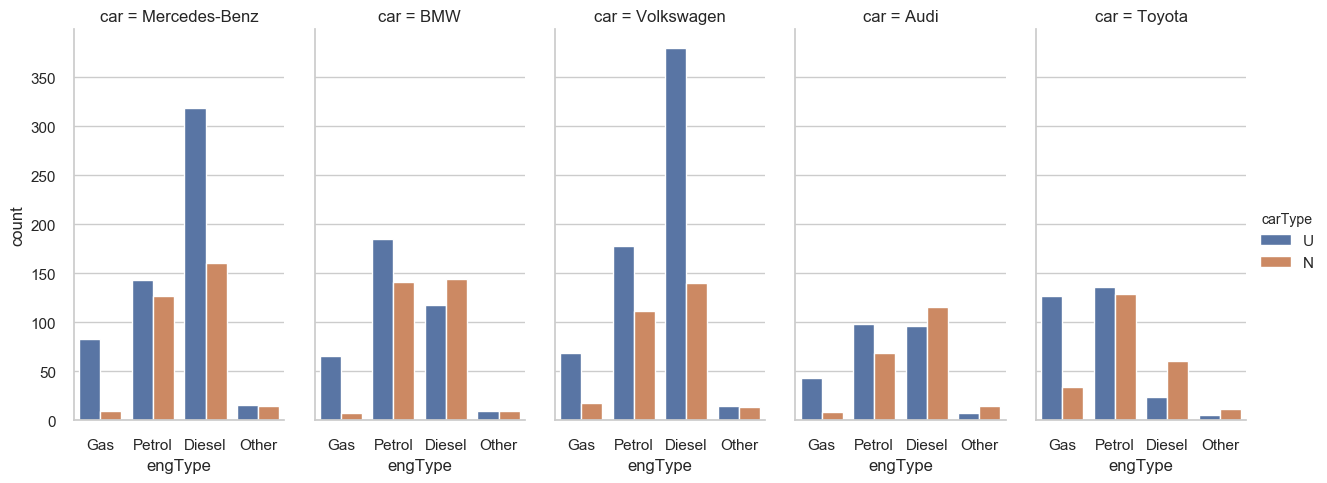

In [38]:
highest_car_makes = ['Mercedes-Benz', 'BMW', 'Volkswagen', 'Toyota', 'Audi']
sns.set(color_codes=True, style='whitegrid')
sns.catplot(data=top_car_makes[top_car_makes['car'].apply(lambda x: x in highest_car_makes)], 
            x='engType', col='car', kind='count', hue='carType', height=5, aspect=.5)

<a id=section642></a>
##### 6.4.2 Point Plot for top 5 makes to know how engine types of these fare with price

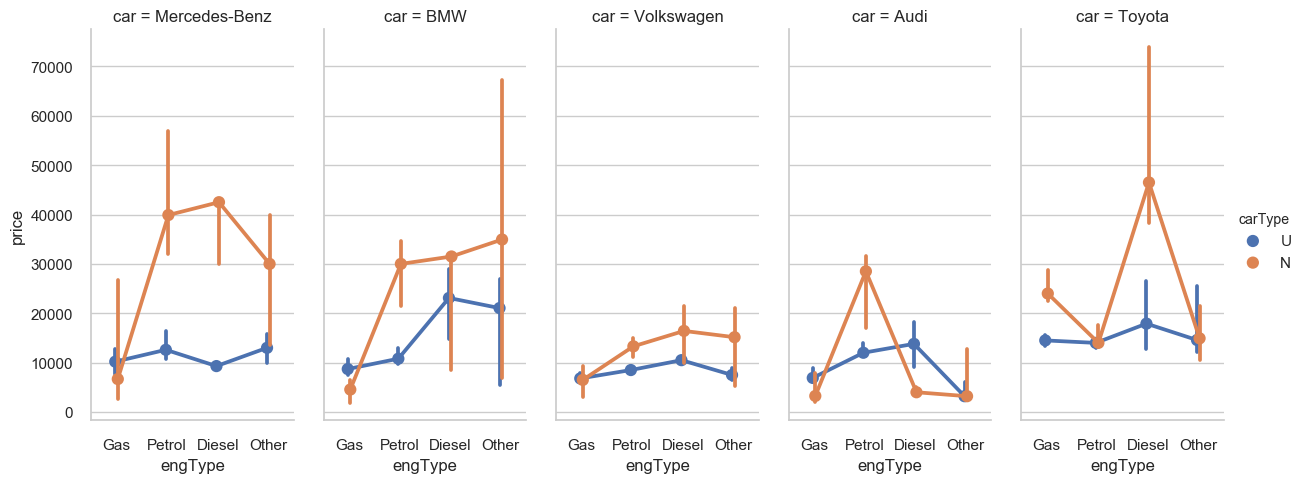

In [39]:
highest_car_makes = ['Mercedes-Benz', 'BMW', 'Volkswagen', 'Toyota', 'Audi']
sns.set(color_codes=True, style='whitegrid')
sns.catplot(data=top_car_makes[top_car_makes['car'].apply(lambda x: x in highest_car_makes)], 
            x='engType', y='price', col='car', dodge=True, kind='point', hue='carType', 
            estimator=median, height=5, aspect=.5)

- From the above count and point plots of FacetGrids, we are sure that the number of units of a car's variant got sold more through their median price has been less, in a particular segment. 
- Like in Mecedes-Benz, Diesel variant units have been sold most in Used cars segment but their median price is the least of all other variants. Hence we should come up with a total_sales cost to know better.

<a id=section643></a>
##### 6.4.3 Calculating priority of car makes with respect to their variants and their contribution towards total sales cost

In [40]:
#top 5 car makes are selcted
top_cars = top_car_makes[top_car_makes['car'].apply(lambda x: x in highest_car_makes)]

top_cars_price_total = top_cars.groupby(['carType', 'car', 'engType']).price.sum().astype(int).reset_index()
top_cars_price_total

,carType,car,engType,price
0,N,Audi,Diesel,1757087
1,N,Audi,Gas,38200
2,N,Audi,Other,226950
3,N,Audi,Petrol,1972210
4,N,BMW,Diesel,3675661
5,N,BMW,Gas,36250
6,N,BMW,Other,420342
7,N,BMW,Petrol,4362944
8,N,Mercedes-Benz,Diesel,7152899
9,N,Mercedes-Benz,Gas,130750


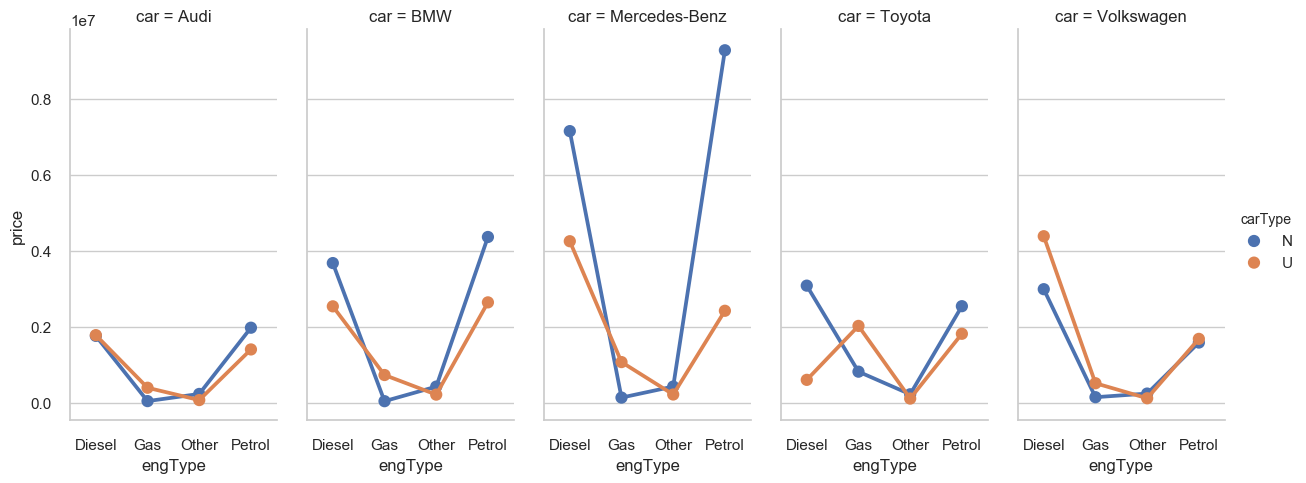

In [41]:
sns.catplot(data=top_cars_price_total, x='engType', y='price', col='car', kind='point', hue='carType',
           estimator=median, height=5, aspect=.5)

- <strong>Observations:</strong>
    - In <i><strong>New Cars:</strong></i> go for this order
        1. <strong>Volkswagen</strong> -> <i>Diesel, Petrol, Other, Gas</i>
        - <strong>Mercedes-Benz</strong> -> <i>Petrol, Diesel, Other, Gas</i>
        - <strong>BMW</strong> -> <i>Petrol, Diesel, Other, Gas</i>
        - <strong>Toyota</strong> -> <i>Diesel, Petrol, Gas, Other</i>
        - <strong>Audi</strong> -> <i>Petrol, Diesel, Other, Gas</i><br/><br/>
    - In <i><strong>Used Cars:</strong></i>go for this order
        1. <strong>Merecedes-Benz</strong> -> <i>Diesel, Petrol, Gas, Other</i>
        - <strong>BMW</strong> -> <i>Petrol, Diesel, Gas, Other</i>
        - <strong>Volkswagen</strong> -> <i>Diesel, Petrol, Gas, Other</i>
        - <strong>Toyota</strong> -> <i>Gas, Petrol, Diesel, Other</i>
        - <strong>Audi</strong> -> <i>Diesel, Petrol, Gas, Other</i>

<a id=section7></a>
### 7. Hypothesis Check

<a id=section701></a>
#### 7.1 <i>Hypothesis</i> 1: 
<strong>Null Hypothesis: </strong> The price of a car doesn't depend on its mileage and registration status. <br>
<strong>Alternative Hypothesis:</strong> The price of a car depends on its mileage and registration status.  <br/>
- We can reject the Null Hypothesis here because as seen __section 3.6__, __section 3.7__, __section 4.4__ and __section 5.3__ mileage and registration do effect the car prices
- Since <strong>mileage</strong> and <strong>registration</strong> gave way for car segementation into <strong>New/Used</strong>, prices varied on the same lines interestingly

<a id=section702></a>
#### 7.2<i> Hypothesis</i> 2:
<strong>Null Hypothesis: </strong> The price of a car doesn't depend on its engine variant. All of them are equal. <br>
<strong>Alternative Hypothesis:</strong> The price of a car depends and varies by its engine variant. <br/>
- We can reject the Null Hypothesis here because as seen in __section 5.5__, price varies distinctly with engine variant
- Which means Diesel cars are costlier , followed by Petrol, Gas and Other type

<a id=section703></a>
#### 7.3 <i>Hypothesis</i> 3:
<strong>Null Hypothesis:</strong> A dealership can stock in inventory with cars of any makes, engine variants, type(New/Used) for their sales don't get effected as long as the inventory is full. <br>
<strong>Alternative Hypothesis:</strong> A dealership cannot stock in inventory with cars of any makes, engine variants, type(New/Used) for their sales do get effected even though the inventory is full..<br/>
- We can reject the Null Hypothesis here because as seen in __section 6.1__,__section 6.2__,__section 6.3__,__section 6.4__, carType, engType, car make definitely effect the business.
- Which means if the inventory is stocked according to the priority matrix given, the sales would be higher and turn time would be more thereby reduing the losses incurred by reaching monthly targets

<a id=section8></a>
### 8. Conclusion
- The data collected was about was of Bergstorm Dealer Automotive inventory sales data with <strong>9576</strong> observations initially
- After dropping duplicates, few missing values and applying transformation like <strong><i>carType</i></strong> column addition, the observations are <strong>9425</strong>
- We have seen how mileage and registration columns give insights about whether a car is Used or New
- We have also seen how <strong>price</strong> varies with <strong>engType, engV, mileage</strong>
- Lastly we have seen what car makes along with their prioritized <strong>engTypes</strong> in respective car segements <i>(New/used)</i> should be stocked in for better sales